In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score



In [33]:
df = pd.read_csv('Car details v3.csv')

In [34]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [35]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [36]:
df.drop_duplicates(inplace =True)
df.dropna(inplace = True)

In [37]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [39]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [40]:
#Lets encode categorical values

categorical = ['fuel', 'seller_type', 'transmission', 'owner']
le = LabelEncoder()

for i in categorical:
    df[i] = le.fit_transform(df[i])

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [42]:
def remove(car):
    kmpl, cc, bhp = car

    kmpl = kmpl.split(' ')[0]

    cc = cc.split(' ')[0]

    bhp = bhp.split(' ')[0]

    return kmpl, cc, bhp

In [43]:
df[['mileage(kmpl)', 'engine(cc)', 'max_power(bhp)']] = df[['mileage', 'engine', 'max_power']].apply(remove, axis= 1, result_type = 'expand')

In [44]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage(kmpl),engine(cc),max_power(bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2


In [45]:
df.drop(['mileage','engine','max_power'], axis = 1, inplace = True)

In [46]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage(kmpl),engine(cc),max_power(bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,190Nm@ 2000rpm,5.0,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2


In [47]:
df.drop(['name','torque'],axis = 1, inplace = True)

In [48]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),engine(cc),max_power(bhp)
0,2014,450000,145500,1,1,1,0,5.0,23.4,1248,74
1,2014,370000,120000,1,1,1,2,5.0,21.14,1498,103.52
2,2006,158000,140000,3,1,1,4,5.0,17.7,1497,78
3,2010,225000,127000,1,1,1,0,5.0,23.0,1396,90
4,2007,130000,120000,3,1,1,0,5.0,16.1,1298,88.2


In [49]:
X = df.drop('selling_price', axis = 1)

In [50]:
y = df['selling_price']

In [51]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),engine(cc),max_power(bhp)
0,2014,145500,1,1,1,0,5.0,23.4,1248,74
1,2014,120000,1,1,1,2,5.0,21.14,1498,103.52
2,2006,140000,3,1,1,4,5.0,17.7,1497,78
3,2010,127000,1,1,1,0,5.0,23.0,1396,90
4,2007,120000,3,1,1,0,5.0,16.1,1298,88.2


In [52]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
#build the deep learning model

model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(X_train, y_train, epochs= 100, batch_size =32, validation_split =0.2)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 547898654720.0000 - val_loss: 606999412736.0000
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 524885983232.0000 - val_loss: 605511090176.0000
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 610611691520.0000 - val_loss: 601179750400.0000
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 568127127552.0000 - val_loss: 592506191872.0000
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 546826092544.0000 - val_loss: 578341699584.0000
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 501259337728.0000 - val_loss: 558752137216.0000
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 498986450944.0000 - val_loss: 532855685120.0000
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 453184126976.0000 - val_loss: 501898969088.0000
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 456967684096.0000 - val_loss: 466454020096.0000
Epoch 10/100
135/1

In [58]:
#history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

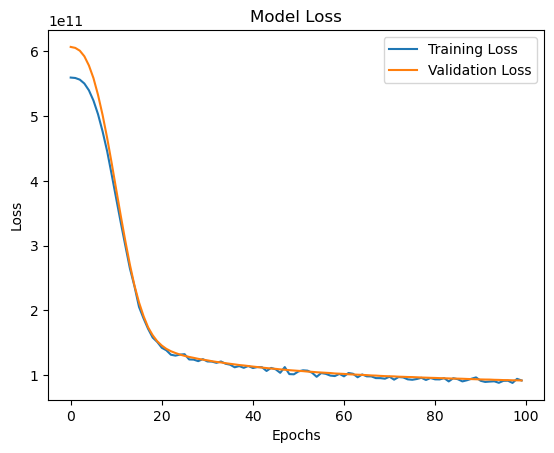

In [59]:
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [60]:
y_pred = model.predict(X_test).flatten()

print('R2 Score: ', r2_score(y_test, y_pred))]
preint('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
